<a href="https://colab.research.google.com/github/Sofia6978/SSN/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pozo de potencial 1D con forma de V**
\
En este caso calcularemos la solución numérica de la ecuación de Schrödinger para una partícula que se encuentra en un potencial finito que se encuentra en forma de V.
\
Primero establecemos la ecuación de la barrera de potencial.

In [148]:
import numpy as tecno
import matplotlib.pyplot as graf
import scipy.sparse as sp
import scipy.sparse.linalg as spla

In [149]:
#Definimos la barrera de potencial
def potV(x, V0=2):
    return V0 * tecno.abs(x)

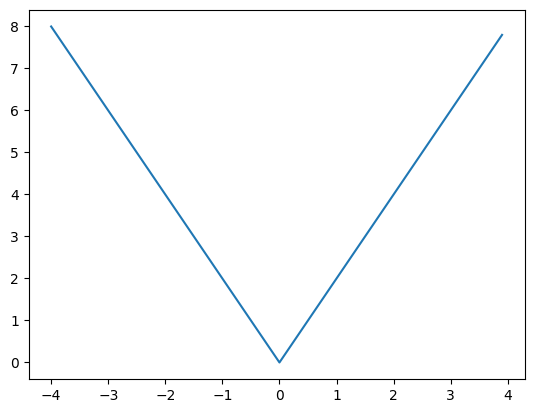

Pozo de potencial con forma de V


In [150]:
xvalores=tecno.arange(-4,4,0.1)
yvalores=[potV(x) for x in xvalores]
graf.plot(xvalores,yvalores)
graf.show()
print("Pozo de potencial con forma de V")

Ahora definimos la discretización (n) a partir de h y los parámetros del pozo de potencial.

In [151]:
L=8
xmin=-L/2
xmax=L/2
#h define la discretización en el espacio
h=0.08
#Con esto definimos los puntos en x donde se calculara la solución
x=tecno.arange(xmin,xmax,h)
npuntos=len(x) #Definimos de esta manera el tamaño de la discretización (n)
print("Utilizaremos en el cálculo",npuntos,"puntos de discretización.")

Utilizaremos en el cálculo 100 puntos de discretización.


A continuación definimos la ecuación de Schrödinger discretizandolo en n puntos, y obteniendo las diferencias finitas de la ecuación en forma de matriz.

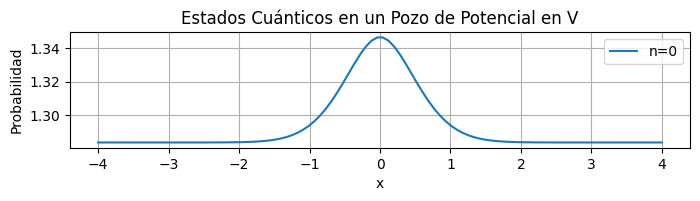

n= 0, E_n= 1.2837512573395244
n= 1, E_n= 2.9439411440138477
n= 2, E_n= 4.089128311214399
n= 3, E_n= 5.146804632157412
n= 4, E_n= 6.08016058657939


In [167]:
#Definimos los parámetros
def solucion_schrodinger(N=npuntos, xmin=-4, xmax=4, mu=1, V0=2, n_states=5):
  dx=(xmax - xmin) / (N - 1)
  x=tecno.linspace(xmin,xmax,N)
  V = potV(x, V0)

  # Construcción de la matriz Hamiltoniana
  diag = tecno.full(N, 1.0 / (mu * dx**2) + V)
  off_diag = tecno.full(N - 1, -0.5 / (mu * dx**2))
  H = sp.diags([off_diag, diag, off_diag], [-1, 0, 1], format="csr")

  #Calculamos los valores y vectores propios de nuestra matriz, que seran las soluciones que buscamos.
  eigenvalues, eigenvectors = spla.eigsh(H, k=n_states, which='SM')
  return x, eigenvalues, eigenvectors

def plot_results(x, eigenvalues, eigenvectors, n_plot=5):
    graf.figure(figsize=(8, 1.5))
    for i in range(0,1):
        graf.plot(x, eigenvectors[:, i]**2 + eigenvalues[i], label=f'n={i}')
    graf.xlabel("x")
    graf.ylabel("Probabilidad")
    graf.title("Estados Cuánticos en un Pozo de Potencial en V")
    graf.legend()
    graf.grid()
    graf.show()
if __name__ == "__main__":
    x, eigenvalues, eigenvectors = solucion_schrodinger()
    plot_results(x, eigenvalues, eigenvectors)

print("n= 0, E_n=",eigenvalues[0])
print("n= 1, E_n=",eigenvalues[1])
print("n= 2, E_n=",eigenvalues[2])
print("n= 3, E_n=",eigenvalues[3])
print("n= 4, E_n=",eigenvalues[4])

Podemos observar los valores de los primeros niveles energéticos.